Ta đọc 4 file từ tập Tín Hiệu Huấn Luyện

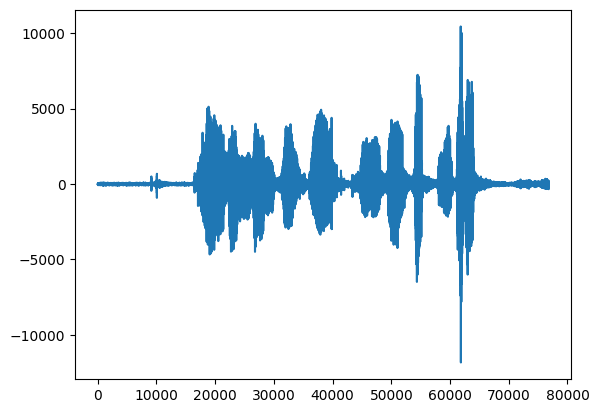

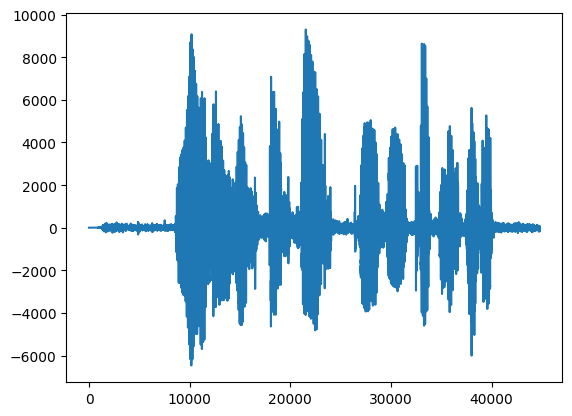

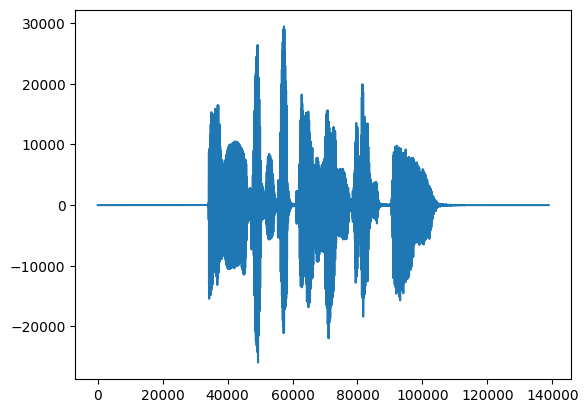

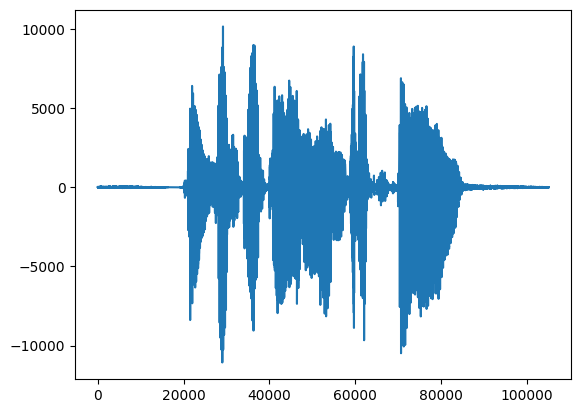

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

# unvoice = AudioSegment.from_file("318622__matucha__roomtone_aircon_01.wav")
# voice = AudioSegment.from_file(
#     "519189__inspectorj__request-42-hmm-i-dont-know.wav")

files = []
files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_F2.wav"))
files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_M2.wav"))
files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_F2.wav"))
files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_M2.wav"))

# uv_samples = np.array(unvoice.get_array_of_samples())
# v_samples = np.array(voice.get_array_of_samples())

PF2 = np.array(files[0].get_array_of_samples())
PM2 = np.array(files[1].get_array_of_samples())
SF2 = np.array(files[2].get_array_of_samples())
SM2 = np.array(files[3].get_array_of_samples())

# plt.plot(np.concatenate([uv_samples, v_samples]))
plt.plot(PF2)

plt.figure()
plt.plot(PM2)

plt.figure()
plt.plot(SF2)

plt.figure()
plt.plot(SM2)
plt.show()

Tính STE (Short Time Energy) của từng tập huấn luyện.

Chia tập huấn luyện thành các frame có độ dài 2048 mẫu và tính STE trên từng frame.

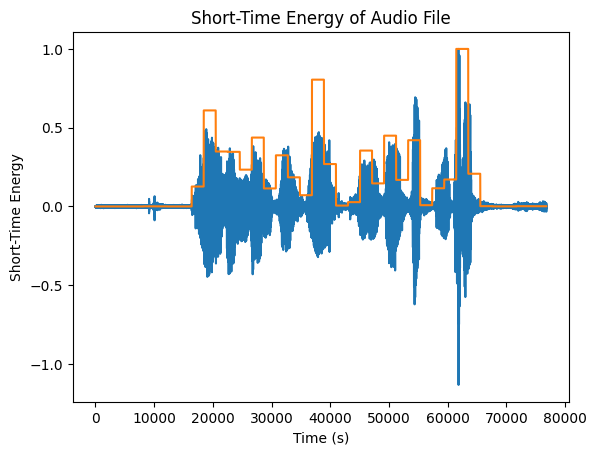

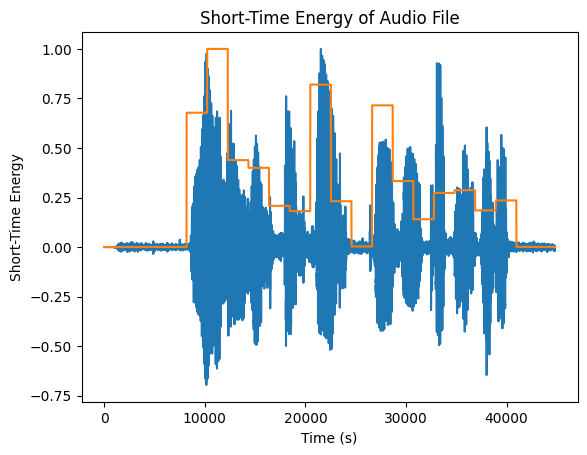

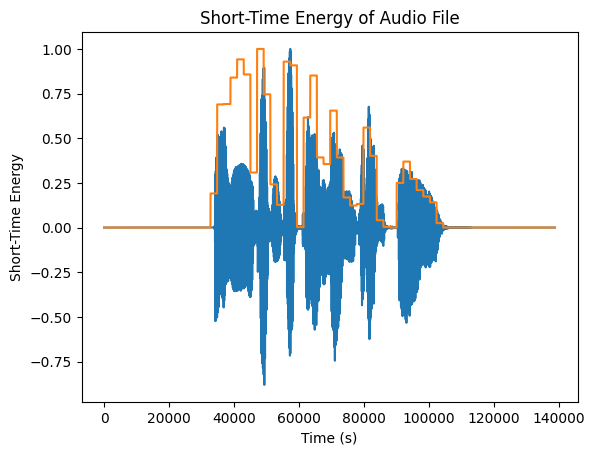

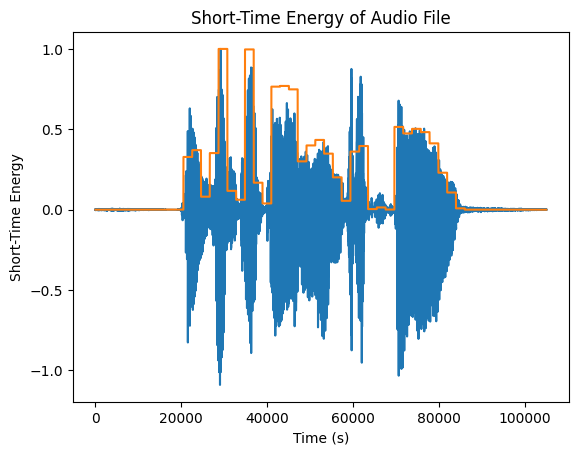

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pydub import AudioSegment

def STE(frame):
    return sum([x**2 for x in frame]) / len(frame)

# Load audio file
# unvoice = AudioSegment.from_file("318622__matucha__roomtone_aircon_01.wav")
# voice = AudioSegment.from_file(
#     "519189__inspectorj__request-42-hmm-i-dont-know.wav")


# files = []
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_F2.wav"))
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_M2.wav"))
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_F2.wav"))
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_M2.wav"))

# Define frame parameters
frame_size = 2048  # Replace with your desired frame size in samples
hop_size = 2048  # Replace with your desired hop size in samples

# Split audio into frames
# uv_samples = np.array(unvoice.get_array_of_samples())
# v_samples = np.array(voice.get_array_of_samples())
# num_frames_uv = int(np.ceil(len(uv_samples) / hop_size))
# num_frames_v = int(np.ceil(len(v_samples) / hop_size))
# frames_uv = np.zeros((num_frames_uv, frame_size))
# frames_v = np.zeros((num_frames_v, frame_size))
# PF2 = np.array(files[0].get_array_of_samples())
# PM2 = np.array(files[1].get_array_of_samples())
# SF2 = np.array(files[2].get_array_of_samples())
# SM2 = np.array(files[3].get_array_of_samples())

num_frames_PF2 = int(np.ceil(len(PF2) / hop_size))
num_frames_PM2 = int(np.ceil(len(PM2) / hop_size))
num_frames_SF2 = int(np.ceil(len(SF2) / hop_size))
num_frames_SM2 = int(np.ceil(len(SM2) / hop_size))

frames_PF2 = np.zeros((num_frames_PF2, frame_size))
frames_PM2 = np.zeros((num_frames_PM2, frame_size))
frames_SF2 = np.zeros((num_frames_SF2, frame_size))
frames_SM2 = np.zeros((num_frames_SM2, frame_size))

# Lấy từng frame của samples
# for i in range(num_frames_uv):
#     frame_start = i * hop_size
#     frame_end = frame_start + frame_size
#     frame = uv_samples[frame_start:frame_end]
#     frames_uv[i, : len(frame)] = frame

# for i in range(num_frames_v):
#     frame_start = i * hop_size
#     frame_end = frame_start + frame_size
#     frame = v_samples[frame_start:frame_end]
#     frames_v[i, : len(frame)] = frame

for i in range(num_frames_PF2):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = PF2[frame_start:frame_end]
    frames_PF2[i, : len(frame)] = frame
    
for i in range(num_frames_PM2):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = PM2[frame_start:frame_end]
    frames_PM2[i, : len(frame)] = frame
    
for i in range(num_frames_SF2):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = SF2[frame_start:frame_end]
    frames_SF2[i, : len(frame)] = frame
    
for i in range(num_frames_SM2):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = SM2[frame_start:frame_end]
    frames_SM2[i, : len(frame)] = frame
    
# Calculate STE
# ste_v = np.zeros(num_frames_v)
# ste_uv = np.zeros(num_frames_uv)
ste_PF2 = np.zeros(num_frames_PF2)
ste_PM2 = np.zeros(num_frames_PM2)
ste_SF2 = np.zeros(num_frames_SF2)
ste_SM2 = np.zeros(num_frames_SM2)

for i in range(num_frames_PF2):
    ste_PF2[i] = STE(frames_PF2[i, :])
ste_PF2 = ste_PF2 / np.max(ste_PF2)

for i in range(num_frames_PM2):
    ste_PM2[i] = STE(frames_PM2[i, :])
ste_PM2 = ste_PM2 / np.max(ste_PM2)

for i in range(num_frames_SF2):
    ste_SF2[i] = STE(frames_SF2[i, :])
ste_SF2 = ste_SF2 / np.max(ste_SF2)

for i in range(num_frames_SM2):
    ste_SM2[i] = STE(frames_SM2[i, :])
ste_SM2 = ste_SM2 / np.max(ste_SM2)

# for i in range(num_frames_uv):
#     ste_uv[i] = STE(frames_uv[i, :])
# # ste_uv = ste_uv / np.max(ste_uv)


# for i in range(num_frames_v):
#     ste_v[i] = STE(frames_v[i, :])
# # ste_v = ste_v / np.max(ste_v)

# ste = np.concatenate([ste_uv, ste_v])

# ste = ste / np.max(ste)

# time_axis = np.arange(len(ste)) * hop_size / (num_frames_uv + num_frames_v)

# plt.plot(time_axis, ste)
# plt.xlabel("Time (s)")
# plt.ylabel("Short-Time Energy")
# plt.title("Short-Time Energy of Audio File")

ste_samples_PF2 = np.zeros(len(PF2))
for i in range(num_frames_PF2):
    ste_samples_PF2[i * hop_size: i * hop_size + frame_size] = ste_PF2[i]
    
ste_samples_PM2 = np.zeros(len(PM2))
for i in range(num_frames_PM2):
    ste_samples_PM2[i * hop_size: i * hop_size + frame_size] = ste_PM2[i]
    
ste_samples_SF2 = np.zeros(len(SF2))
for i in range(num_frames_SF2):
    ste_samples_SF2[i * hop_size: i * hop_size + frame_size] = ste_SF2[i]
    
ste_samples_SM2 = np.zeros(len(SM2))
for i in range(num_frames_SM2):
    ste_samples_SM2[i * hop_size: i * hop_size + frame_size] = ste_SM2[i]

plt.plot(PF2 / abs(np.max(PF2)))
plt.plot(ste_samples_PF2)
plt.xlabel("Time (s)")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File")

plt.figure()
plt.plot(PM2 / abs(np.max(PM2)))
plt.plot(ste_samples_PM2)
plt.xlabel("Time (s)")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File")

plt.figure()
plt.plot(SF2 / abs(np.max(SF2)))
plt.plot(ste_samples_SF2)
plt.xlabel("Time (s)")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File")

plt.figure()
plt.plot(SM2 / abs(np.max(SM2)))
plt.plot(ste_samples_SM2)
plt.xlabel("Time (s)")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File")

plt.show()

PF2:
0.00	1.02	sil
1.02	1.88	v
1.88	1.95	uv
1.95	2.16	v
2.16	2.25	uv
2.25	2.60	v
2.60	2.75	uv
2.75	3.34	v
3.34	3.38	uv
3.38	3.45	v
3.45	3.62 	uv
3.62	3.80	v
3.80	3.91	uv
3.91	4.00	v
4.00	4.04	uv
4.04	4.80	sil

PM2:
0.00	0.53	sil
0.53	1.05	v
1.05	1.12	uv
1.12	1.24	v
1.24	1.31	uv
1.31	1.46	v
1.46	1.68	uv
1.68	1.97	v
1.97	2.06	uv
2.06	2.12	v
2.12	2.17	uv
2.17	2.30	v
2.30	2.43 	uv
2.43	2.50 	v
2.50	2.52 	uv
2.52	2.80 	sil

SF2:
0.00	0.77	sil
0.77	1.25	v
1.25	1.27	uv
1.27	1.35	v
1.35	1.41	uv
1.41	1.76	v
1.76	1.83	uv
1.83	1.98	v
1.98	2.06	uv
2.06	2.37	v
2.37	3.14	sil

SM2:
0.00	0.45	sil
0.45	0.48	uv
0.48	0.77	v
0.77	0.79	uv
0.79	0.88	v
0.88	0.92	uv
0.92	1.32	v
1.32	1.37	uv
1.37	1.53	v
1.53	1.59	uv
1.59	1.93	v
1.93	2.38	sil

Đánh nhãn các frame là tiếng nói hoặc khoảng lặng dựa trên các khoảng cho trước từ file .lab

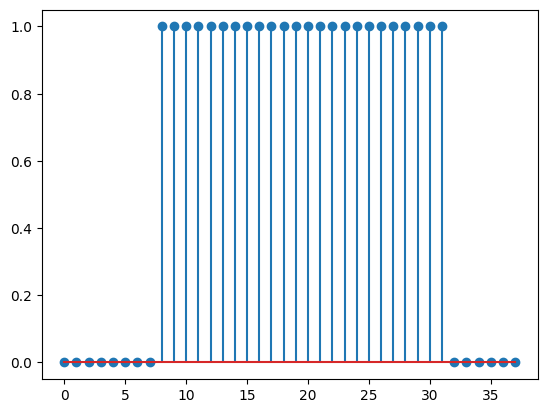

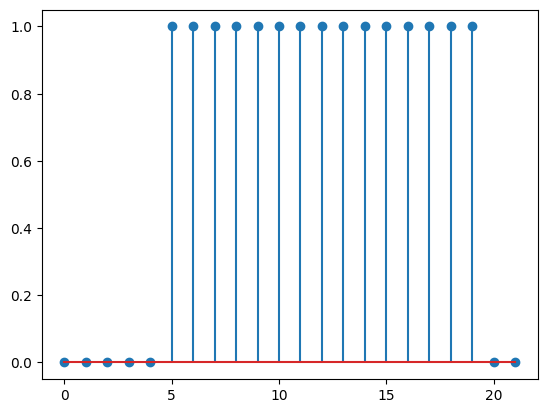

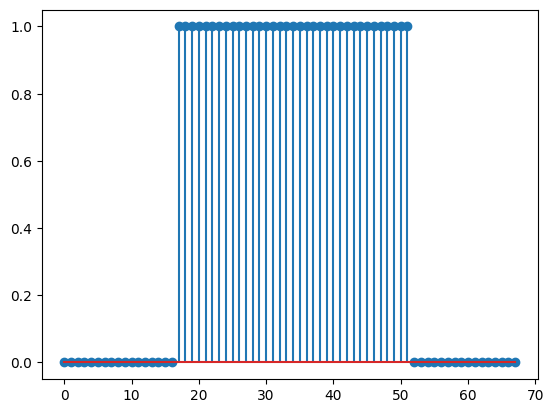

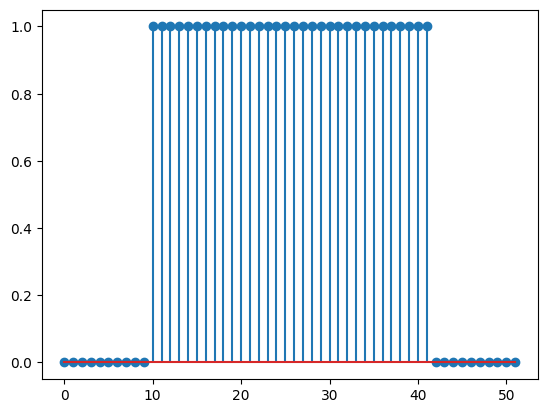

In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pydub import AudioSegment

# def STE(frame):
#     return sum([x**2 for x in frame]) / len(frame)

# unvoice = AudioSegment.from_file("318622__matucha__roomtone_aircon_01.wav")
# voice = AudioSegment.from_file(
#     "519189__inspectorj__request-42-hmm-i-dont-know.wav")
# files = []
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_F2.wav"))
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_M2.wav"))
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_F2.wav"))
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_M2.wav"))

sample_rate_PF2 = files[0].frame_rate
sample_rate_PM2 = files[1].frame_rate
sample_rate_SF2 = files[2].frame_rate
sample_rate_SM2 = files[3].frame_rate
# # Define frame parameters
# frame_size = 2048  # Replace with your desired frame size in samples
# hop_size = 2048  # Replace with your desired hop size in samples

# Split audio into frames
# uv_samples = np.array(unvoice.get_array_of_samples())
# v_samples = np.array(voice.get_array_of_samples())
# num_frames_uv = int(np.ceil(len(uv_samples) / hop_size))
# num_frames_v = int(np.ceil(len(v_samples) / hop_size))
# frames_uv = np.zeros((num_frames_uv, frame_size))
# frames_v = np.zeros((num_frames_v, frame_size))

# PF2 = np.array(files[0].get_array_of_samples())
# PM2 = np.array(files[1].get_array_of_samples())
# SF2 = np.array(files[2].get_array_of_samples())
# SM2 = np.array(files[3].get_array_of_samples())

# num_frames_PF2 = int(np.ceil(len(PF2) / hop_size))
# num_frames_PM2 = int(np.ceil(len(PM2) / hop_size))
# num_frames_SF2 = int(np.ceil(len(SF2) / hop_size))
# num_frames_SM2 = int(np.ceil(len(SM2) / hop_size))

label_PF2 = np.zeros(num_frames_PF2)
label_PM2 = np.zeros(num_frames_PM2)
label_SF2 = np.zeros(num_frames_SF2)
label_SM2 = np.zeros(num_frames_SM2)

# Lấy từng frame của samples
# for i in range(num_frames_uv):
#     frame_start = i * hop_size
#     frame_end = frame_start + frame_size
#     frame = uv_samples[frame_start:frame_end]
#     frames_uv[i, : len(frame)] = frame

# for i in range(num_frames_v):
#     frame_start = i * hop_size
#     frame_end = frame_start + frame_size
#     frame = v_samples[frame_start:frame_end]
#     frames_v[i, : len(frame)] = frame

# unvoiced_PF2 = [(0.00, 1.02),
#                 (1.88, 1.95),
#                 (2.16, 2.25),
#                 (2.60, 2.75),
#                 (3.34, 3.38),
#                 (3.45, 3.62),
#                 (3.80, 3.91),
#                 (4.00, 4.04),
#                 (4.04, 4.80),]

# voiced_PF2 =   [(1.02, 1.88),
#                 (1.95, 2.16),
#                 (2.25, 2.60),
#                 (2.75, 3.34),
#                 (3.38, 3.45),
#                 (3.62, 3.80),
#                 (3.91, 4.00),]

speech_PF2 = [(1.02, 4.04)]

silence_PF2 = [(0.00, 1.02), 
               (4.04, 4.80),]

for i in range(num_frames_PF2):
    t = i * hop_size / sample_rate_PF2
    for start, end in silence_PF2:
        if(t >= start and t <= end):
            label_PF2[i] = 0
            break
    for start, end in speech_PF2:
        if(t >= start and t <= end):
            label_PF2[i] = 1
            break
    
# unvoiced_PM2 = [(0.00, 0.53),
#                 (1.05, 1.12),
#                 (1.24, 1.31),
#                 (1.46, 1.68),
#                 (1.97, 2.06),
#                 (2.12, 2.17),
#                 (2.30, 2.43),
#                 (2.50, 2.52),
#                 (2.52, 2.80),]

# voiced_PM2 =   [(0.53, 1.05),
#                 (1.12, 1.24),
#                 (1.31, 1.46),
#                 (1.68, 1.97),
#                 (2.06, 2.12),
#                 (2.17, 2.30),
#                 (2.43, 2.50),]

speech_PM2 = [(0.53, 2.52)]

silence_PM2 = [(0.00, 0.53), 
               (2.52, 2.80),]

for i in range(num_frames_PM2):
    t = i * hop_size / sample_rate_PM2
    for start, end in silence_PM2:
        if(t >= start and t <= end):
            label_PM2[i] = 0
            break
    for start, end in speech_PM2:
        if(t >= start and t <= end):
            label_PM2[i] = 1
            break
    
# unvoiced_SF2 = [(0.00, 0.77),
#                 (1.25, 1.27),
#                 (1.35, 1.41),
#                 (1.76, 1.83),
#                 (1.98, 2.06),
#                 (2.37, 3.14),]

# voiced_SF2 =   [(0.77, 1.25),
#                 (1.27, 1.35),
#                 (1.41, 1.76),
#                 (1.83, 1.98),
#                 (2.06, 2.37),]

speech_SF2 = [(0.77, 2.37)]

silence_SF2 = [(0.00, 0.77), 
               (2.37, 3.14),]

for i in range(num_frames_SF2):
    t = i * hop_size / sample_rate_SF2
    for start, end in silence_SF2:
        if(t >= start and t <= end):
            label_SF2[i] = 0
            break
    for start, end in speech_SF2:
        if(t >= start and t <= end):
            label_SF2[i] = 1
            break
    
# unvoiced_SM2 = [(0.00, 0.45),
#                 (0.45, 0.48),
#                 (0.77, 0.79),
#                 (0.88, 0.92),
#                 (1.32, 1.37),
#                 (1.53, 1.59),
#                 (1.93, 2.38),]

# voiced_SM2 =   [(0.48, 0.77),
#                 (0.79, 0.88),
#                 (0.92, 1.32),
#                 (1.37, 1.53),
#                 (1.59, 1.93),]

speech_SM2 = [(0.45, 1.93)]

silence_SM2 = [(0.00, 0.45), 
               (1.93, 2.38),]

for i in range(num_frames_SM2):
    t = i * hop_size / sample_rate_SM2
    for start, end in silence_SM2:
        if(t >= start and t <= end):
            label_SM2[i] = 0
            break
    for start, end in speech_SM2:
        if(t >= start and t <= end):
            label_SM2[i] = 1
            break

# Calculate STE
# ste_v = np.zeros(num_frames_v)
# ste_uv = np.zeros(num_frames_uv)

# for i in range(num_frames_uv):
#     ste_uv[i] = STE(frames_uv[i, :])
# # ste_uv = ste_uv / np.max(ste_uv)


# for i in range(num_frames_v):
#     ste_v[i] = STE(frames_v[i, :])
# # ste_v = ste_v / np.max(ste_v)

# ste = np.concatenate([ste_uv, ste_v])

# ste = ste / np.max(ste)

# # ste_v = ste_v / np.max(ste_v)

# labeled_uv = np.array([0 for _ in range(num_frames_uv)])
# # labeled_v = np.array([1 if ste_v[i] > 0.2 else 0 for i in range(num_frames_v)])
# labeled_v = np.array([1 for _ in range(num_frames_v)])
# labeled = np.concatenate([labeled_uv, labeled_v])

# def cost_function(threshold):
#     is_voiced = np.zeros(num_frames_uv + num_frames_v)
#     for i in range(num_frames_uv + num_frames_v):
#         is_voiced[i] = 1 if ste[i] > threshold else 0
#     num_misclassified_frames = np.sum(labeled != is_voiced)
#     return num_misclassified_frames

# # Define the range of threshold values to search over
# threshold_values = np.linspace(0, 1, num=1000)

# # Find the threshold value that minimizes the cost function
# min_threshold = np.argmin([cost_function(T) for T in threshold_values])

# # Print the optimal threshold value and the corresponding cost
# print("Optimal threshold value:", threshold_values[min_threshold])
# print("Minimum cost:", cost_function(threshold_values[min_threshold]))

# cost = []
# for i in range(1000):
#     cost.append(cost_function(threshold_values[i]))
    
# plt.plot(threshold_values, cost)
# plt.xlabel("Threshold value")
# plt.ylabel("Cost function")

# plt.show()

plt.stem(label_PF2)


plt.figure()
plt.stem(label_PM2)


plt.figure()
plt.stem(label_SF2)


plt.figure()
plt.stem(label_SM2)

plt.show()

Xác định ngưỡng tối ưu sử dụng hàm cost function

...

cost = số frame TN nhầm thành KL / số frame TN nhận đúng + số frame KL nhầm thành TN / số frame KL nhận đúng


Cho ngưỡng từ 0 đến 1 ta có sơ đồ cost function như sau

Optimal threshold value: 0.0021002100210021
Minimum cost: 0.060326659641728134


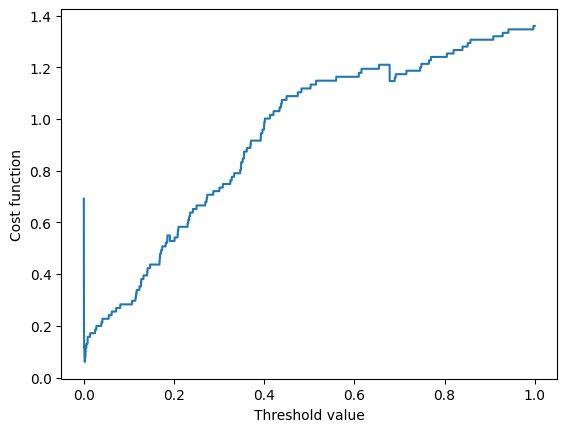

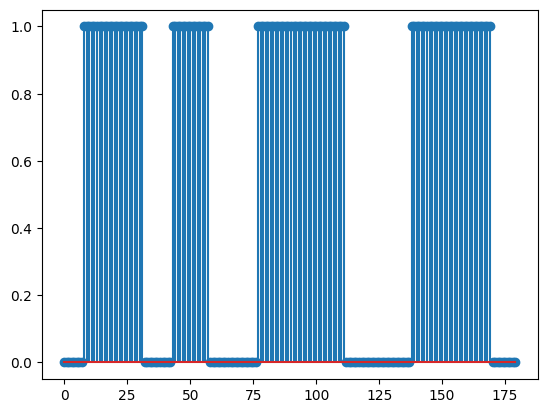

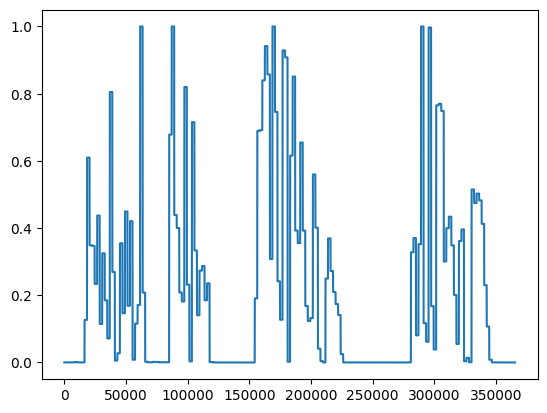

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pydub import AudioSegment

# def STE(frame):
#     return sum([x**2 for x in frame]) / len(frame)


# files = []
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_F2.wav"))
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\phone_M2.wav"))
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_F2.wav"))
# files.append(AudioSegment.from_file("TinHieuHuanLuyen\studio_M2.wav"))

# sample_rate_PF2 = files[0].frame_rate
# sample_rate_PM2 = files[1].frame_rate
# sample_rate_SF2 = files[2].frame_rate
# sample_rate_SM2 = files[3].frame_rate

# # Define frame parameters
# frame_size = 2048  # Replace with your desired frame size in samples
# hop_size = 2048  # Replace with your desired hop size in samples
# threshold = 0.001  # Replace with your desired threshold for STE classification

# audio = AudioSegment.from_file("studio_F2.wav")

# # Split audio into frames
# samples = np.array(audio.get_array_of_samples())
# num_frames = int(np.ceil(len(samples) / hop_size))
# frames = np.zeros((num_frames, frame_size))
# for i in range(num_frames):
#     frame_start = i * hop_size
#     frame_end = frame_start + frame_size
#     frame = samples[frame_start:frame_end]
#     frames[i, :len(frame)] = frame

# PF2 = np.array(files[0].get_array_of_samples())
# PM2 = np.array(files[1].get_array_of_samples())
# SF2 = np.array(files[2].get_array_of_samples())
# SM2 = np.array(files[3].get_array_of_samples())

# num_frames_PF2 = int(np.ceil(len(PF2) / hop_size))
# num_frames_PM2 = int(np.ceil(len(PM2) / hop_size))
# num_frames_SF2 = int(np.ceil(len(SF2) / hop_size))
# num_frames_SM2 = int(np.ceil(len(SM2) / hop_size))

# label_PF2 = np.zeros(num_frames_PF2)
# label_PM2 = np.zeros(num_frames_PM2)
# label_SF2 = np.zeros(num_frames_SF2)
# label_SM2 = np.zeros(num_frames_SM2)

# speech_PF2 = [(1.02, 4.04)]

# silence_PF2 = [(0.00, 1.02), 
#                (4.04, 4.80),]

# for i in range(num_frames_PF2):
#     t = i * hop_size / sample_rate_PF2
#     for start, end in silence_PF2:
#         if(t >= start and t <= end):
#             label_PF2[i] = 0
#             break
#     for start, end in speech_PF2:
#         if(t >= start and t <= end):
#             label_PF2[i] = 1
#             break
    
# speech_PM2 = [(0.53, 2.52)]

# silence_PM2 = [(0.00, 0.53), 
#                (2.52, 2.80),]

# for i in range(num_frames_PM2):
#     t = i * hop_size / sample_rate_PM2
#     for start, end in silence_PM2:
#         if(t >= start and t <= end):
#             label_PM2[i] = 0
#             break
#     for start, end in speech_PM2:
#         if(t >= start and t <= end):
#             label_PM2[i] = 1
#             break
    
# speech_SF2 = [(0.77, 2.37)]

# silence_SF2 = [(0.00, 0.77), 
#                (2.37, 3.14),]

# for i in range(num_frames_SF2):
#     t = i * hop_size / sample_rate_SF2
#     for start, end in silence_SF2:
#         if(t >= start and t <= end):
#             label_SF2[i] = 0
#             break
#     for start, end in speech_SF2:
#         if(t >= start and t <= end):
#             label_SF2[i] = 1
#             break
    
# speech_SM2 = [(0.45, 1.93)]

# silence_SM2 = [(0.00, 0.45), 
#                (1.93, 2.38),]

# for i in range(num_frames_SM2):
#     t = i * hop_size / sample_rate_SM2
#     for start, end in silence_SM2:
#         if(t >= start and t <= end):
#             label_SM2[i] = 0
#             break
#     for start, end in speech_SM2:
#         if(t >= start and t <= end):
#             label_SM2[i] = 1
#             break
        
# label_PF2_PM2 = np.concatenate([label_PF2, label_PM2])
# label_SF2_SM2 = np.concatenate([label_SF2, label_SM2])
# label = np.concatenate([label_PF2_PM2, label_SF2_SM2])
label = np.concatenate([label_PF2, label_PM2, label_SF2, label_SM2])

# Calculate STE
# frames_PF2 = np.zeros((num_frames_PF2, frame_size))
# frames_PM2 = np.zeros((num_frames_PM2, frame_size))
# frames_SF2 = np.zeros((num_frames_SF2, frame_size))
# frames_SM2 = np.zeros((num_frames_SM2, frame_size))

# for i in range(num_frames_PF2):
#     frame_start = i * hop_size
#     frame_end = frame_start + frame_size
#     frame = PF2[frame_start:frame_end]
#     frames_PF2[i, : len(frame)] = frame
    
# for i in range(num_frames_PM2):
#     frame_start = i * hop_size
#     frame_end = frame_start + frame_size
#     frame = PM2[frame_start:frame_end]
#     frames_PM2[i, : len(frame)] = frame
    
# for i in range(num_frames_SF2):
#     frame_start = i * hop_size
#     frame_end = frame_start + frame_size
#     frame = SF2[frame_start:frame_end]
#     frames_SF2[i, : len(frame)] = frame
    
# for i in range(num_frames_SM2):
#     frame_start = i * hop_size
#     frame_end = frame_start + frame_size
#     frame = SM2[frame_start:frame_end]
#     frames_SM2[i, : len(frame)] = frame
    
# ste_PF2 = np.zeros(num_frames_PF2)
# ste_PM2 = np.zeros(num_frames_PM2)
# ste_SF2 = np.zeros(num_frames_SF2)
# ste_SM2 = np.zeros(num_frames_SM2)

# for i in range(num_frames_PF2):
#     ste_PF2[i] = STE(frames_PF2[i, :])
# ste_PF2 = ste_PF2 / np.max(ste_PF2)

# for i in range(num_frames_PM2):
#     ste_PM2[i] = STE(frames_PM2[i, :])
# ste_PM2 = ste_PM2 / np.max(ste_PM2)

# for i in range(num_frames_SF2):
#     ste_SF2[i] = STE(frames_SF2[i, :])
# ste_SF2 = ste_SF2 / np.max(ste_SF2)

# for i in range(num_frames_SM2):
#     ste_SM2[i] = STE(frames_SM2[i, :])
# ste_SM2 = ste_SM2 / np.max(ste_SM2)

# ste_PF2_PM2 = np.concatenate([ste_PF2, ste_PM2])
# ste_SF2_SM2 = np.concatenate([ste_SF2, ste_SM2])
# ste = np.concatenate([ste_PF2_PM2, ste_SF2_SM2])
ste = np.concatenate([ste_PF2, ste_PM2, ste_SF2, ste_SM2])

def cost_function(threshold):
    is_voiced = np.zeros(num_frames_PF2 + num_frames_PM2 + num_frames_SF2 + num_frames_SM2)
    for i in range(num_frames_PF2 + num_frames_PM2 + num_frames_SF2 + num_frames_SM2):
        is_voiced[i] = 1 if ste[i] >= threshold else 0
    # num_misclassified_frames = np.sum(label != is_voiced)
    # return num_misclassified_frames
    countTP = 0
    countTN = 0
    for i in range(len(is_voiced)):
        if is_voiced[i] == True and label[i] == False:
            countTN += 1 # True Negative
        elif is_voiced[i] == True and label[i] == True:
            countTP += 1 # True Positive
    
    countFP = 0
    countFN = 0
    for i in range(len(is_voiced)):
        if is_voiced[i] == False and label[i] == True:
            countFN += 1 # False Negative
        elif is_voiced[i] == False and label[i] == False:
            countFP += 1 # False Positive
    
    countTP += 1
    countFP += 1
    return countTN / countTP + countFN / countFP
# Define the range of threshold values to search over
threshold_values = np.linspace(0, 1, num=10000)

# Find the threshold value that minimizes the cost function
min_threshold = np.argmin([cost_function(T) for T in threshold_values])

# Print the optimal threshold value and the corresponding cost
print("Optimal threshold value:", threshold_values[min_threshold])
print("Minimum cost:", cost_function(threshold_values[min_threshold]))

cost = []
for i in range(len(threshold_values)):
    cost.append(cost_function(threshold_values[i]))
    
plt.plot(threshold_values, cost)
plt.xlabel("Threshold value")
plt.ylabel("Cost function")

plt.figure()
plt.stem(label)

plt.show()


# ste_samples_PF2 = np.zeros(len(PF2))
# for i in range(num_frames_PF2):
#     ste_samples_PF2[i * hop_size: i * hop_size + frame_size] = ste_PF2[i]
    
# ste_samples_PM2 = np.zeros(len(PM2))
# for i in range(num_frames_PM2):
#     ste_samples_PM2[i * hop_size: i * hop_size + frame_size] = ste_PM2[i]
    
# ste_samples_SF2 = np.zeros(len(SF2))
# for i in range(num_frames_SF2):
#     ste_samples_SF2[i * hop_size: i * hop_size + frame_size] = ste_SF2[i]
    
# ste_samples_SM2 = np.zeros(len(SM2))
# for i in range(num_frames_SM2):
#     ste_samples_SM2[i * hop_size: i * hop_size + frame_size] = ste_SM2[i]

plt.figure()
plt.plot(np.concatenate([ste_samples_PF2, ste_samples_PM2, ste_samples_SF2, ste_samples_SM2]))

plt.show()

# energy = np.zeros(num_frames)
# for i in range(num_frames):
#     energy[i] = STE(frames[i, :])
# energy = energy / np.max(energy)

# is_voiced = np.zeros(num_frames)
# for j in range(num_frames):
#     is_voiced[j] = 1 if energy[j] > threshold else 0

# sample_rate = audio.frame_rate
# time_axis = np.arange(len(energy)) * hop_size / sample_rate

# #plot figure

# ste_samples = np.zeros(len(samples))
# for i in range(num_frames):
#     ste_samples[i * frame_size: i * frame_size + frame_size] = energy[i]

# plt.plot(ste_samples)
# plt.axhline(y = threshold, color = "red")
# plt.xlabel("Time (s)")
# plt.ylabel("Short-Time Energy")
# plt.title("Short-Time Energy of Audio File")

# plt.figure()
# plt.stem(time_axis, is_voiced, use_line_collection=True)
# plt.xlabel("Time (s)")
# plt.ylabel("Voiced/Unvoiced")
# plt.title("Classification of Audio Frames")



# plt.figure()
# plt.plot(samples / abs(np.max(samples)), color = "blue")
# plt.plot(ste_samples, color = "red")
# plt.xlabel("Time (s)")
# plt.title("Audio File")

# plt.show()

PF1:
0.00	0.53	sil
0.53	1.14	v
1.14	1.21	uv
1.21	1.35	v
1.35	1.45	uv
1.45	1.60	v
1.60	1.83	uv
1.83	2.20	v
2.20	2.28	uv
2.28	2.35	v
2.35	2.40	uv
2.40	2.52	v
2.52	2.66	uv
2.66	2.73	v
2.73	2.75 	uv
2.75	3.23	sil

PM1:
0.00	0.46	sil
0.46	1.39	v
1.39	1.50	uv
1.50	1.69	v
1.69	1.79	uv
1.79	2.78	v
2.78	2.86	uv
2.86	2.93	v
2.93	3.10	uv
3.10	3.29	v
3.29	3.45	uv
3.45	3.52	v
3.52	4.15 	sil

SF1:
0.00	0.68	sil
0.68	0.70	uv
0.70	1.10	v
1.10	1.13	uv
1.13	1.22	v
1.22	1.27	uv
1.27	1.65	v
1.65	1.70	uv
1.70	1.76	v
1.76	1.79	uv
1.79	1.86	v
1.86	1.92	uv
1.92	2.15	v
2.15	2.86	sil

SM1:
0.00	0.87	sil
0.87	0.94	uv
0.94	1.26	v
1.26	1.33	uv
1.33	1.59	v
1.59	1.66	uv
1.66	1.78	v
1.78	1.82	uv
1.82	2.06	v
2.06	2.73	sil

Đọc 4 file từ tập Tín Hiệu Kiểm Thử và phân đoạn dựa trên ngưỡng tối ưu đã tìm được

Tính hiệu suất phân đoạn dựa trên kết quả tìm được so với nhãn đã cho trước

Efficiency:  81.11111111111111 %


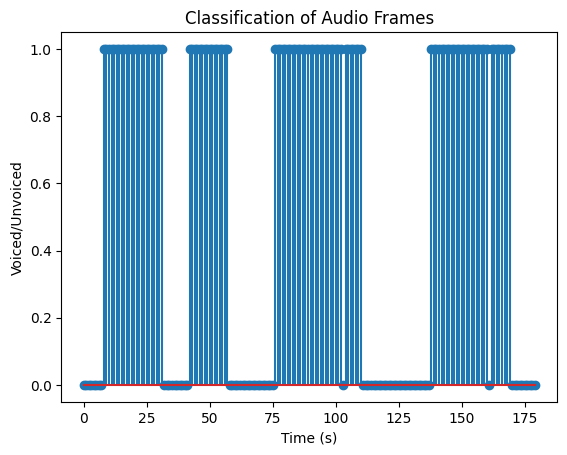

In [8]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pydub import AudioSegment

# def STE(frame):
#     return sum([x**2 for x in frame]) / len(frame)

files_KT = []
files_KT.append(AudioSegment.from_file("TinHieuKiemThu\phone_F1.wav"))
files_KT.append(AudioSegment.from_file("TinHieuKiemThu\phone_M1.wav"))
files_KT.append(AudioSegment.from_file("TinHieuKiemThu\studio_F1.wav"))
files_KT.append(AudioSegment.from_file("TinHieuKiemThu\studio_M1.wav"))

sample_rate_PF1 = files_KT[0].frame_rate
sample_rate_PM1 = files_KT[1].frame_rate
sample_rate_SF1 = files_KT[2].frame_rate
sample_rate_SM1 = files_KT[3].frame_rate

# # Define frame parameters
# frame_size = 2048  # Replace with your desired frame size in samples
# hop_size = 2048  # Replace with your desired hop size in samples

PF1 = np.array(files[0].get_array_of_samples())
PM1 = np.array(files[1].get_array_of_samples())
SF1 = np.array(files[2].get_array_of_samples())
SM1 = np.array(files[3].get_array_of_samples())

num_frames_PF1 = int(np.ceil(len(PF1) / hop_size))
num_frames_PM1 = int(np.ceil(len(PM1) / hop_size))
num_frames_SF1 = int(np.ceil(len(SF1) / hop_size))
num_frames_SM1 = int(np.ceil(len(SM1) / hop_size))

label_PF1 = np.zeros(num_frames_PF1)
label_PM1 = np.zeros(num_frames_PM1)
label_SF1 = np.zeros(num_frames_SF1)
label_SM1 = np.zeros(num_frames_SM1)

speech_PF1 = [(0.53, 2.75)]

silence_PF1 = [(0.00, 0.53), 
               (2.75, 3.23),]

for i in range(num_frames_PF1):
    t = i * hop_size / sample_rate_PF1
    for start, end in silence_PF1:
        if(t >= start and t <= end):
            label_PF1[i] = 0
            break
    for start, end in speech_PF1:
        if(t >= start and t <= end):
            label_PF1[i] = 1
            break
        
speech_PM1 = [(0.46, 3.52)]

silence_PM1 = [(0.00, 0.46), 
               (3.52, 4.15),]

for i in range(num_frames_PM1):
    t = i * hop_size / sample_rate_PM1
    for start, end in silence_PM1:
        if(t >= start and t <= end):
            label_PM1[i] = 0
            break
    for start, end in speech_PM1:
        if(t >= start and t <= end):
            label_PM1[i] = 1
            break
        
speech_SF1 = [(0.68, 2.15)]

silence_SF1 = [(0.00, 0.68), 
               (2.15, 2.86),]

for i in range(num_frames_SF1):
    t = i * hop_size / sample_rate_SF1
    for start, end in silence_SF1:
        if(t >= start and t <= end):
            label_SF1[i] = 0
            break
    for start, end in speech_SF1:
        if(t >= start and t <= end):
            label_SF1[i] = 1
            break
        
speech_SM1 = [(0.87, 2.06)]

silence_SM1 = [(0.00, 0.87), 
               (2.06, 2.73),]

for i in range(num_frames_SM1):
    t = i * hop_size / sample_rate_SM1
    for start, end in silence_SM1:
        if(t >= start and t <= end):
            label_SM1[i] = 0
            break
    for start, end in speech_SM1:
        if(t >= start and t <= end):
            label_SM1[i] = 1
            break
        
label_KT = np.concatenate([label_PF1, label_PM1, label_SF1, label_SM1])

frames_PF1 = np.zeros((num_frames_PF1, frame_size))
frames_PM1 = np.zeros((num_frames_PM1, frame_size))
frames_SF1 = np.zeros((num_frames_SF1, frame_size))
frames_SM1 = np.zeros((num_frames_SM1, frame_size))

for i in range(num_frames_PF1):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = PF1[frame_start:frame_end]
    frames_PF1[i, : len(frame)] = frame
    
for i in range(num_frames_PM1):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = PM1[frame_start:frame_end]
    frames_PM1[i, : len(frame)] = frame
    
for i in range(num_frames_SF1):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = SF1[frame_start:frame_end]
    frames_SF1[i, : len(frame)] = frame
    
for i in range(num_frames_SM1):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = SM1[frame_start:frame_end]
    frames_SM1[i, : len(frame)] = frame
    
ste_PF1 = np.zeros(num_frames_PF1)
ste_PM1 = np.zeros(num_frames_PM1)
ste_SF1 = np.zeros(num_frames_SF1)
ste_SM1 = np.zeros(num_frames_SM1)

for i in range(num_frames_PF1):
    ste_PF1[i] = STE(frames_PF1[i, :])
ste_PF1 = ste_PF1 / np.max(ste_PF1)

for i in range(num_frames_PM1):
    ste_PM1[i] = STE(frames_PM1[i, :])
ste_PM1 = ste_PM1 / np.max(ste_PM1)

for i in range(num_frames_SF1):
    ste_SF1[i] = STE(frames_SF1[i, :])
ste_SF1 = ste_SF1 / np.max(ste_SF1)

for i in range(num_frames_SM1):
    ste_SM1[i] = STE(frames_SM1[i, :])
ste_SM1 = ste_SM1 / np.max(ste_SM1)

ste_KT = np.concatenate([ste_PF2, ste_PM2, ste_SF2, ste_SM2])

threshold = 0.0021002100210021

is_voiced = np.zeros(len(ste_KT))
for i in range(len(ste_KT)):
        is_voiced[i] = 1 if ste_KT[i] >= threshold else 0
        
plt.stem(is_voiced, use_line_collection=True)
plt.xlabel("Time (s)")
plt.ylabel("Voiced/Unvoiced")
plt.title("Classification of Audio Frames")

print("Efficiency: ", ((np.sum(label_KT == is_voiced) / len(is_voiced))) * 100 , "%")